In [3]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import psycopg2 as psql  
import numpy as np
import pandas as pd
import config as cfg
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sqlalchemy import create_engine


In [4]:
conn_string = f'postgresql://{cfg.PG4_USER}:{cfg.PG4_PWD}@{cfg.PG4_HOST}/{cfg.PG4_DBNAME}'
  
db = create_engine(conn_string)
conn = db.connect()

data_get_query = 'select * from divorce_2010;'
divorce_2010_df = pd.read_sql(data_get_query, con = conn)

data_get_query = 'select * from divorce_2000;'
divorce_2000_df = pd.read_sql(data_get_query, con = conn)

data_get_query = 'select * from county_Temp;'
county_temp_df = pd.read_sql(data_get_query, con = conn)

data_get_query = 'select * from county_Precip;'
county_precip_df = pd.read_sql(data_get_query, con = conn)

conn.close()

In [5]:
dfp_2000 = county_precip_df.loc[county_precip_df['Year'] == 2000]
dfp_2010 = county_precip_df.loc[county_precip_df['Year'] == 2010]
dft_2000 = county_temp_df.loc[county_temp_df['Year'] == 2000]
dft_2010 = county_temp_df.loc[county_temp_df['Year'] == 2010]

dfp_2010.tail()

,index,co_fips,Year,Days with > 0.1 inch of Precipitation,Extreme maximum precipitation,Days with snow depth > 1 inch
5466,5466,56037,2010,48.0,0.756667,12.333333
5467,5467,56039,2010,97.0,1.260000,42.666667
5468,5468,56041,2010,97.0,1.013333,23.333333
5469,5469,56043,2010,92.0,1.340000,19.000000
5470,5470,56045,2010,47.0,1.045000,16.000000


In [6]:
div2010_temp_df = divorce_2010_df.merge(dft_2010,left_on='co_fips', right_on = 'co_fips', how='outer')
div2010_precip_df = divorce_2010_df.merge(dfp_2010,left_on='co_fips', right_on = 'co_fips', how='outer')
div2000_temp_df = divorce_2000_df.merge(dft_2000,left_on='co_fips', right_on = 'co_fips', how='outer')
div2000_precip_df = divorce_2000_df.merge(dfp_2000,left_on='co_fips', right_on = 'co_fips', how='outer')

div2000_precip_df.head()

,co_fips,Census,divorces,Geographic Area,year,index,Year,Days with > 0.1 inch of Precipitation,Extreme maximum precipitation,Days with snow depth > 1 inch
0,02013,2697.0,2.0,"Aleutians East, AK",2000.0,59.0,2000.0,260.0,3.320000,12.000000
1,02016,5465.0,11.0,"Aleutians West, AK",2000.0,60.0,2000.0,172.0,1.223333,16.333333
2,02020,260283.0,1301.0,"Anchorage, AK",2000.0,61.0,2000.0,217.0,4.233333,35.000000
3,02050,16006.0,19.0,"Bethel, AK",2000.0,62.0,2000.0,143.0,2.666667,50.000000
4,02060,1258.0,2.0,"Bristol Bay, AK",2000.0,63.0,2000.0,142.0,0.970000,21.000000


In [7]:
div2000_precip_df = div2000_precip_df.drop(columns = ['Census','divorces','Geographic Area','year','index','Year'])

div2010_precip_df = div2010_precip_df.drop(columns = ['Census','divorces','Geographic Area','year','index','Year'])

div2000_weather_df = div2000_temp_df.merge(div2000_precip_df,left_on='co_fips', right_on = 'co_fips', how='outer')
div2010_weather_df = div2010_temp_df.merge(div2010_precip_df,left_on='co_fips', right_on = 'co_fips', how='outer')

div2000_weather_df = div2000_weather_df.drop(columns = ['Year','index'])
div2010_weather_df = div2010_weather_df.drop(columns = ['Year','index'])

div2010_weather_df

,co_fips,divorces,Geographic Area,Census,year,Average Temp,Days Over 90,Days Under 32,Days with > 0.1 inch of Precipitation,Extreme maximum precipitation,Days with snow depth > 1 inch
0,01001,231,"Autauga, AL",54571,2010,NaN,NaN,NaN,91.0,3.025000,0.000000
1,01003,980,"Baldwin, AL",182265,2010,67.0,75.000000,22.000000,110.0,3.515000,0.000000
2,01005,69,"Barbour, AL",27457,2010,67.0,118.000000,33.333333,NaN,NaN,NaN
3,01007,53,"Bibb, AL",22915,2010,64.8,84.333333,59.666667,94.0,3.925000,0.000000
4,01009,258,"Blount, AL",57322,2010,NaN,NaN,NaN,104.0,7.605000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3137,56039,79,"Teton, WY",21294,2010,38.7,0.000000,206.666667,97.0,1.260000,42.666667
3138,56041,128,"Uinta, WY",21118,2010,40.3,4.666667,197.666667,97.0,1.013333,23.333333
3139,56043,43,"Washakie, WY",8533,2010,41.1,34.666667,177.000000,92.0,1.340000,19.000000
3140,56045,31,"Weston, WY",7208,2010,44.3,46.666667,175.333333,47.0,1.045000,16.000000


In [8]:
divorce_weather_df = div2000_weather_df.append(div2010_weather_df)


divorce_weather_df.tail()

,co_fips,Census,divorces,Geographic Area,year,Average Temp,Days Over 90,Days Under 32,Days with > 0.1 inch of Precipitation,Extreme maximum precipitation,Days with snow depth > 1 inch
3137,56039,21294.0,79.0,"Teton, WY",2010.0,38.7,0.000000,206.666667,97.0,1.260000,42.666667
3138,56041,21118.0,128.0,"Uinta, WY",2010.0,40.3,4.666667,197.666667,97.0,1.013333,23.333333
3139,56043,8533.0,43.0,"Washakie, WY",2010.0,41.1,34.666667,177.000000,92.0,1.340000,19.000000
3140,56045,7208.0,31.0,"Weston, WY",2010.0,44.3,46.666667,175.333333,47.0,1.045000,16.000000
3141,51019,68676.0,234.0,"Bedford, VA",2010.0,NaN,NaN,NaN,135.0,4.353333,0.000000


In [9]:
# Drop the non-beneficial ID columns
clean_divorce_df = divorce_weather_df.drop(["co_fips", 'Geographic Area'], axis=1)
clean_divorce_df['divorce_rate_per_1000'] = (clean_divorce_df['divorces']/clean_divorce_df['Census']*1000).astype(float)
clean_divorce_df.drop(columns=['divorces'], inplace=True)

clean_divorce_df.dropna()
clean_divorce_df

,Census,year,Average Temp,Days Over 90,Days Under 32,Days with > 0.1 inch of Precipitation,Extreme maximum precipitation,Days with snow depth > 1 inch,divorce_rate_per_1000
0,2697.0,2000.0,38.7,18.666667,107.333333,260.0,3.320000,12.000000,0.741565
1,5465.0,2000.0,36.5,0.000000,156.333333,172.0,1.223333,16.333333,2.012809
2,260283.0,2000.0,38.7,0.000000,130.000000,217.0,4.233333,35.000000,4.998406
3,16006.0,2000.0,30.6,0.000000,201.000000,143.0,2.666667,50.000000,1.187055
4,1258.0,2000.0,35.1,0.000000,217.666667,142.0,0.970000,21.000000,1.589825
...,...,...,...,...,...,...,...,...,...
3137,21294.0,2010.0,38.7,0.000000,206.666667,97.0,1.260000,42.666667,3.709965
3138,21118.0,2010.0,40.3,4.666667,197.666667,97.0,1.013333,23.333333,6.061180
3139,8533.0,2010.0,41.1,34.666667,177.000000,92.0,1.340000,19.000000,5.039259
3140,7208.0,2010.0,44.3,46.666667,175.333333,47.0,1.045000,16.000000,4.300777


In [23]:
clean_divorce_df = clean_divorce_df[clean_divorce_df.divorce_rate_per_1000 < 100]

In [24]:
import seaborn as sn
import matplotlib.pyplot as plt

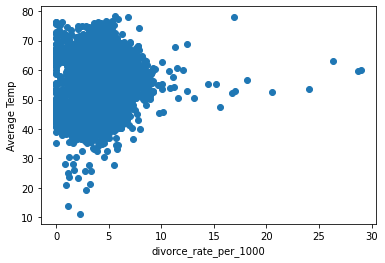

In [25]:
plt.scatter(clean_divorce_df.divorce_rate_per_1000, clean_divorce_df['Average Temp']	)
plt.xlabel('divorce_rate_per_1000')
plt.ylabel('Average Temp')
#plt.show()
plt.savefig('../Images/avgtemp_div.png')

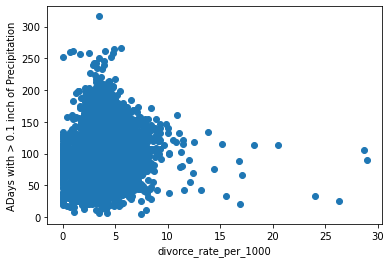

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(clean_divorce_df.divorce_rate_per_1000, clean_divorce_df['Days with > 0.1 inch of Precipitation']	)
plt.xlabel('divorce_rate_per_1000')
plt.ylabel('ADays with > 0.1 inch of Precipitation')
plt.show()
plt.savefig('../Images/rain_div.png')

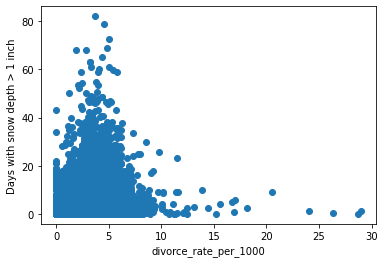

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(clean_divorce_df.divorce_rate_per_1000, clean_divorce_df['Days with snow depth > 1 inch']	)
plt.xlabel('divorce_rate_per_1000')
plt.ylabel('Days with snow depth > 1 inch')
plt.show()
plt.savefig('../Images/snow_div.png')

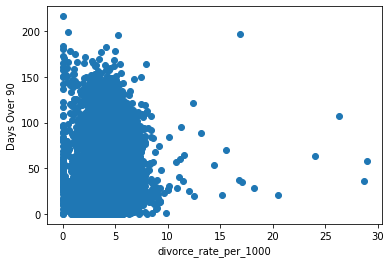

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(clean_divorce_df.divorce_rate_per_1000, clean_divorce_df['Days Over 90']	)
plt.xlabel('divorce_rate_per_1000')
plt.ylabel('Days Over 90')
plt.show()
plt.savefig('../Images/90temp_div.png')